In [1]:
%run preamble_notebooks.py

In [2]:
n_sim, nobs, expo = 100, 500, 250
err_pnl, popsize = 3e5, 5000
# Setting the true model
f1, f2 = bs.loss_model("Weibull", ["k1", "β1"]), bs.loss_model("Lomax", ["α2", "σ2"])
f_true = bs.spliced_loss_model(f1, f2, "continuous")
parms_true = np.array([1/2, 1, 2.5, 3, 1.5])

f_true.set_ppf(), f_true.set_pdf(),f_true.set_cdf()

# We set the priority to the 90% quantile and the limit to the 0.99% quantile
P, L = f_true.ppf(parms_true, 0.9), f_true.ppf(parms_true, 0.99)
premiums = f_true.PP(parms_true), f_true.XOLP(parms_true, P, L)

%time PnLs = np.array(f_true.PnL(parms_true, P, L, expo, premiums, safety_loadings = [0.05, 0.05],  n_sim = err_pnl))

Wall time: 24.8 s


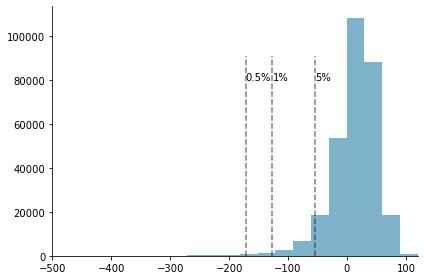

In [3]:
fig, ax = plt.subplots()
num_bins = 200
ax.hist(PnLs, num_bins, alpha=0.5, color = '#006699')
quantiles = np.quantile(PnLs, [0.005, 0.01, 0.05])
quantile_order = ['0.5%', '1%', '5%']
for k, quantile in enumerate(quantiles):
    ax.axvline(quantile, 0, 0.8, alpha = 0.5 , color = "k", linestyle = '--')
    ax.annotate(quantile_order[k], xy=(quantile, 80000))
plt.xlim(-500, max(PnLs))

fig.tight_layout()
sns.despine()
plt.savefig("../../../SMCLoMo/Figures/hist_pnl.pdf")

# Well specified model

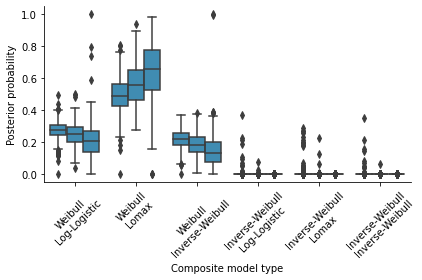

In [4]:
fig, ax = plt.subplots()
df = well_spec_df[well_spec_df.model_name != "BMA"]
g = sns.boxplot(ax = ax, x = "model_name", y = "posterior_probability",hue="nobs", data = df)
ax.legend([],[], frameon=False)
labels = [item.get_text() for item in ax.get_xticklabels()]
model_names = ['\n'.join(np.char.split(label, sep = "_").tolist()) for label in labels]

ax.set_xticklabels(model_names)
ax.tick_params(axis='x', rotation=45)
g.set(xlabel="Composite model type", ylabel="Posterior probability")
for i,box in enumerate(g.artists):

    box.set_facecolor((0, 0.4, 0.6, 0.75))
fig.tight_layout()
sns.despine()
plt.savefig("../../../SMCLoMo/Figures/boxplot_post_prob_model_wellspec.pdf")

In [23]:
well_spec_df

,Unnamed: 0,sim,model_name,nobs,log_marg,γ_map,γ_true,cap005,cap01,cap05,cap005_true,cap01_true,cap05_true,posterior_probability
0,0,0,Weibull_Log-Logistic,500,-395.804474,1.908442,1.5,-411.128935,-270.364388,-84.815071,-169.545828,-125.425716,-54.565734,2.837346e-01
1,1,0,Weibull_Lomax,500,-395.250382,1.609427,1.5,-218.559162,-151.210244,-53.197721,-169.545828,-125.425716,-54.565734,4.938000e-01
2,2,0,Weibull_Inverse-Weibull,500,-396.047741,2.278764,1.5,-513.356465,-332.860779,-110.962150,-169.545828,-125.425716,-54.565734,2.224654e-01
3,3,0,Inverse-Weibull_Log-Logistic,500,-416.814063,0.601580,1.5,-459.211184,-289.244449,-77.369198,-169.545828,-125.425716,-54.565734,2.130902e-10
4,4,0,Inverse-Weibull_Lomax,500,-415.536253,0.204253,1.5,-262.403483,-175.547350,-55.451665,-169.545828,-125.425716,-54.565734,7.647320e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,2,999,Weibull_Inverse-Weibull,2000,-1447.591071,3.712839,1.5,-342.776201,-228.488905,-77.951504,-171.593500,-127.252632,-54.307932,1.763578e-01
6996,3,999,Inverse-Weibull_Log-Logistic,2000,-1502.564273,1.714737,1.5,-377.589430,-247.663432,-72.117066,-171.593500,-127.252632,-54.307932,2.354163e-25
6997,4,999,Inverse-Weibull_Lomax,2000,-1491.396428,0.155600,1.5,-463.928645,-313.592994,-116.862620,-171.593500,-127.252632,-54.307932,1.667131e-20
6998,5,999,Inverse-Weibull_Inverse-Weibull,2000,-1503.280034,2.517354,1.5,-404.991690,-261.935525,-80.853997,-171.593500,-127.252632,-54.307932,1.150761e-25


In [5]:
k, nobs = 0, 500
list_df = []
best_model_name = []
for k in range(1000):
    for nobs in [500, 1000, 2000]:
        s1 = (well_spec_df.sim ==k).values & (well_spec_df.nobs == nobs).values
        s2 = well_spec_df[s1].log_marg == well_spec_df[s1].log_marg.max()
        df = well_spec_df[s1][s2]
        best_model_name.append(well_spec_df[s1][s2].model_name.values)
        df["model_name"] = "best"
        list_df.append(df)
well_spec_df_V1 = pd.concat([well_spec_df, pd.concat(list_df)])

print(np.mean(np.transpose(np.stack(best_model_name))[0] == "Weibull_Lomax"))

0.945


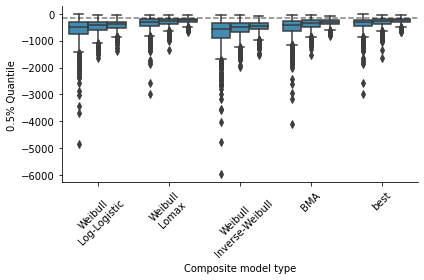

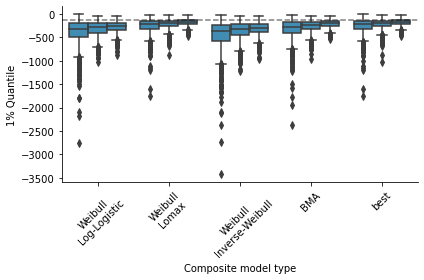

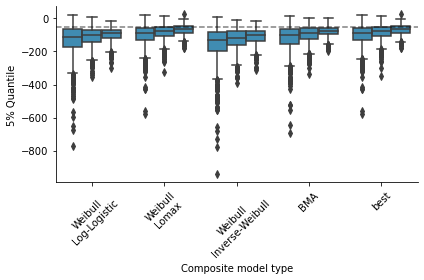

In [6]:
caps  = ["cap005", "cap01", "cap05"]
ylabs = ["0.5% Quantile", "1% Quantile", "5% Quantile"]
for k, cap in enumerate(caps):
    fig, ax = plt.subplots()
    well_spec_df_V1["err_"+cap] = np.abs((well_spec_df_V1[cap].values - well_spec_df_V1[cap+"_true"].values)) / np.abs(well_spec_df_V1[cap+"_true"].values)
    model_names = ["Weibull_Log-Logistic", "Weibull_Lomax", "Weibull_Inverse-Weibull", "BMA"]
    s = (well_spec_df_V1.model_name.values =="Weibull_Log-Logistic") |\
    (well_spec_df_V1.model_name.values =="Weibull_Lomax") |\
    (well_spec_df_V1.model_name.values =="Weibull_Inverse-Weibull")|\
    (well_spec_df_V1.model_name.values =="BMA")|\
    (well_spec_df_V1.model_name.values =="best")
    df = well_spec_df_V1[s]
    g = sns.boxplot(ax = ax, x = "model_name", y = cap, hue = "nobs", data = df)
    ax.tick_params(axis='x', rotation=45)
    ax.legend([],[], frameon=False)
    labels = [item.get_text() for item in ax.get_xticklabels()]
    model_names = ['\n'.join(np.char.split(label, sep = "_").tolist()) for label in labels]

    ax.set_xticklabels(model_names)
    ax.tick_params(axis='x', rotation=45)
    g.set(xlabel="Composite model type", ylabel=ylabs[k])
    for i,box in enumerate(g.artists):

        box.set_facecolor((0, 0.4, 0.6, 0.75))
    fig.tight_layout()
    sns.despine()
    ax.axhline(well_spec_df[cap+"_true"].iloc[0], 0, 1, alpha = 0.5 , color = "k", linestyle = '--')
    plt.savefig("../../../SMCLoMo/Figures/boxplot_"+cap+"_wellspec.pdf")

In [7]:
well_spec_df_V1["err_cap005"] = np.abs((well_spec_df_V1["cap005"].values - well_spec_df_V1["cap005_true"].values)) / np.abs(well_spec_df_V1["cap005_true"].values)
well_spec_df_V1["err_cap01"] = np.abs((well_spec_df_V1["cap01"].values - well_spec_df_V1["cap01_true"].values)) / np.abs(well_spec_df_V1["cap01_true"].values)
well_spec_df_V1["err_cap05"] = np.abs((well_spec_df_V1["cap05"].values - well_spec_df_V1["cap05_true"].values)) / np.abs(well_spec_df_V1["cap05_true"].values)
well_spec_df_V1[["model_name", "nobs", "err_cap005", "err_cap01", "err_cap05"]].groupby(["model_name", "nobs"]).mean()

err_cap005  err_cap01  err_cap05
model_name                      nobs                                  
BMA                             500     2.015709   1.709621   1.346312
                                1000    1.324182   1.143279   0.879902
                                2000    0.836264   0.708889   0.558481
Inverse-Weibull_Inverse-Weibull 500    34.456974  20.053280   7.392587
                                1000   11.620724   8.152859   4.130150
                                2000    4.576155   3.538526   2.131931
Inverse-Weibull_Log-Logistic    500    43.815757  29.331708  14.064003
                                1000   30.877619  21.770255  11.400907
                                2000   20.099579  14.567586   8.499312
Inverse-Weibull_Lomax           500     5.327367   4.149871   2.818579
                                1000    3.519825   2.964621   2.237438
                                2000    2.683707   2.291518   1.854730
Weibull_Inverse-Weibull         500     3.191262   2.642308   1.939029
                                1000    2.278331   1.918317   1.376464
                                2000    1.731833   1.432537   1.027308
Weibull_Log-Logistic            500     2.569188   2.137780   1.580940
                                1000    1.890861   1.595241   1.136837
                                2000    1.466179   1.211009   0.853219
Weibull_Lomax                   500     1.305001   1.162648   1.043827
                                1000    0.858677   0.778556   0.690147
                                2000    0.543966   0.484535   0.446296
best                            500     1.335384   1.183110   1.049343
                                1000    0.887062   0.798796   0.696094
                                2000    0.557649   0.494175   0.449893

# Miss specified model

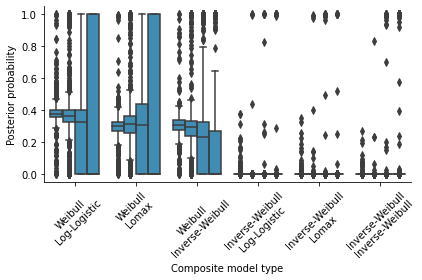

In [2]:
fig, ax = plt.subplots()
df = miss_spec_df[miss_spec_df.model_name != "BMA"]

g = sns.boxplot(ax = ax, x = "model_name", y = "posterior_probability",hue="nobs", data = df)
ax.legend([],[], frameon=False)
labels = [item.get_text() for item in ax.get_xticklabels()]
model_names = ['\n'.join(np.char.split(label, sep = "_").tolist()) for label in labels]

ax.set_xticklabels(model_names)
ax.tick_params(axis='x', rotation=45)
g.set(xlabel="Composite model type", ylabel="Posterior probability")
for i,box in enumerate(g.artists):

    box.set_facecolor((0, 0.4, 0.6, 0.75))
fig.tight_layout()
sns.despine()
plt.savefig("../../../SMCLoMo/Figures/boxplot_post_prob_model_missspec.pdf")

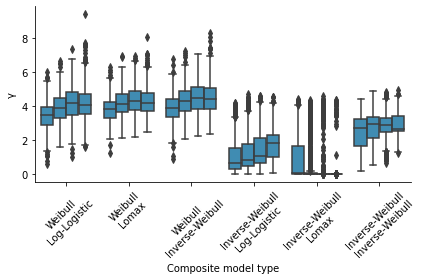

In [3]:
fig, ax = plt.subplots()
df = miss_spec_df[miss_spec_df.model_name != "BMA"]

g = sns.boxplot(ax = ax, x = "model_name", y = "γ_map",hue="nobs", data = df)
ax.legend([],[], frameon=False)
labels = [item.get_text() for item in ax.get_xticklabels()]
model_names = ['\n'.join(np.char.split(label, sep = "_").tolist()) for label in labels]

ax.set_xticklabels(model_names)
ax.tick_params(axis='x', rotation=45)
g.set(xlabel="Composite model type", ylabel="γ")
for i,box in enumerate(g.artists):

    box.set_facecolor((0, 0.4, 0.6, 0.75))
fig.tight_layout()
sns.despine()
plt.savefig("../../../SMCLoMo/Figures/boxplot_thresh_model_missspec.pdf")

In [8]:
k, nobs = 0, 500
list_df = []

for nobs in [500, 1000, 2000, 5000]:
    best_model_name = []
    for k in range(1000):
        s1 = (miss_spec_df.sim ==k).values & (miss_spec_df.nobs == nobs).values
        s2 = miss_spec_df[s1].log_marg == miss_spec_df[s1].log_marg.max()
        df = miss_spec_df[s1][s2]
        best_model_name.append(miss_spec_df[s1][s2].model_name.values)
        df["model_name"] = "best"
        list_df.append(df)
    print(nobs)
    print(np.mean(np.transpose(np.stack(best_model_name))[0] == "Weibull_Log-Logistic"))
    print(np.mean(np.transpose(np.stack(best_model_name))[0] == "Weibull_Lomax"))
    print(np.mean(np.transpose(np.stack(best_model_name))[0] == "Weibull_Inverse-Weibull"))
    print(np.mean(np.transpose(np.stack(best_model_name))[0] == "Inverse-Weibull_Lomax"))
    print(np.mean(np.transpose(np.stack(best_model_name))[0] == "Inverse-Weibull_Log-Logistic"))
    print(np.mean(np.transpose(np.stack(best_model_name))[0] == "Inverse-Weibull_Inverse-Weibull"))
miss_spec_df_V1 = pd.concat([miss_spec_df, pd.concat(list_df)])


500
0.77
0.116
0.111
0.001
0.002
0.0
1000
0.552
0.288
0.152
0.004
0.003
0.001
2000
0.387
0.38
0.194
0.01
0.009
0.02
5000
0.321
0.369
0.221
0.01
0.017
0.062


In [6]:
print(np.mean(np.transpose(np.stack(best_model_name))[0] == "Weibull_Log-Logistic"))
print(np.mean(np.transpose(np.stack(best_model_name))[0] == "Weibull_Lomax"))
print(np.mean(np.transpose(np.stack(best_model_name))[0] == "Weibull_Inverse-Weibull"))
print(np.mean(np.transpose(np.stack(best_model_name))[0] == "Inverse-Weibull_Lomax"))
print(np.mean(np.transpose(np.stack(best_model_name))[0] == "Inverse-Weibull_Log-Logistic"))
print(np.mean(np.transpose(np.stack(best_model_name))[0] == "Inverse-Weibull_Inverse-Weibull"))

0.321
0.369
0.221
0.01
0.017
0.062


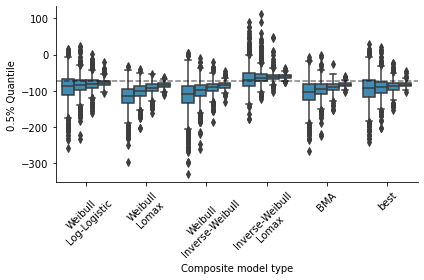

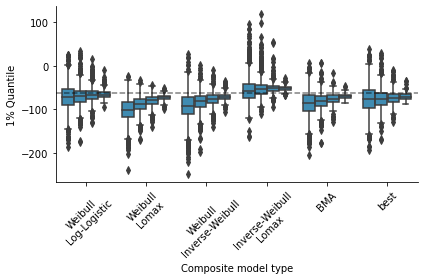

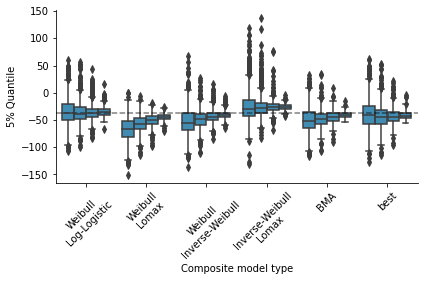

In [10]:
caps  = ["cap005", "cap01", "cap05"]
ylabs = ["0.5% Quantile", "1% Quantile", "5% Quantile"]
for k, cap in enumerate(caps):
    fig, ax = plt.subplots()
    miss_spec_df_V1["err_"+cap] = np.abs((miss_spec_df_V1[cap].values - miss_spec_df_V1[cap+"_true"].values)) / np.abs(miss_spec_df_V1[cap+"_true"].values)
    model_names = ["Weibull_Log-Logistic", "Weibull_Lomax", "Weibull_Inverse-Weibull", "BMA"]
    s = (miss_spec_df_V1.model_name.values =="Weibull_Log-Logistic") |\
    (miss_spec_df_V1.model_name.values =="Weibull_Lomax") |\
    (miss_spec_df_V1.model_name.values =="Weibull_Inverse-Weibull")|\
    (miss_spec_df_V1.model_name.values =="BMA")|\
    (miss_spec_df_V1.model_name.values =="best")|\
    (miss_spec_df_V1.model_name.values =="Inverse-Weibull_Lomax")
    s = (miss_spec_df_V1.model_name.values !="Inverse-Weibull_Inverse-Weibull") & (miss_spec_df_V1.model_name.values !="Inverse-Weibull_Log-Logistic")
  
    df = miss_spec_df_V1[s]
    g = sns.boxplot(ax = ax, x = "model_name", y = cap, hue = "nobs", data = df)
    ax.tick_params(axis='x', rotation=45)
    ax.legend([],[], frameon=False)
    labels = [item.get_text() for item in ax.get_xticklabels()]
    model_names = ['\n'.join(np.char.split(label, sep = "_").tolist()) for label in labels]

    ax.set_xticklabels(model_names)
    ax.tick_params(axis='x', rotation=45)
    g.set(xlabel="Composite model type", ylabel=ylabs[k])
    for i,box in enumerate(g.artists):

        box.set_facecolor((0, 0.4, 0.6, 0.75))
    fig.tight_layout()
    sns.despine()
    ax.axhline(miss_spec_df[cap+"_true"].iloc[0], 0, 1, alpha = 0.5 , color = "k", linestyle = '--')
    plt.savefig("../../../SMCLoMo/Figures/boxplot_"+cap+"_missspec.pdf")

In [11]:
miss_spec_df_V1["err_cap005"] = np.abs((miss_spec_df_V1["cap005"].values - miss_spec_df_V1["cap005_true"].values)) / np.abs(miss_spec_df_V1["cap005_true"].values)
miss_spec_df_V1["err_cap01"] = np.abs((miss_spec_df_V1["cap01"].values - miss_spec_df_V1["cap01_true"].values)) / np.abs(miss_spec_df_V1["cap01_true"].values)
miss_spec_df_V1["err_cap05"] = np.abs((miss_spec_df_V1["cap05"].values - miss_spec_df_V1["cap05_true"].values)) / np.abs(miss_spec_df_V1["cap05_true"].values)
# miss_spec_df_V1["err_cap005"] = np.abs((miss_spec_df_V1["cap005"].values - miss_spec_df_V1["cap005_true"].values))**2
miss_spec_df_V1[["model_name", "nobs", "err_cap005", "err_cap01", "err_cap05"]].groupby(["model_name", "nobs"]).mean()

err_cap005  err_cap01  err_cap05
model_name                      nobs                                  
BMA                             500     0.528770   0.481900   0.582958
                                1000    0.367598   0.339217   0.434314
                                2000    0.239057   0.224721   0.300891
                                5000    0.149821   0.130065   0.156838
Inverse-Weibull_Inverse-Weibull 500     1.549982   1.294346   1.484564
                                1000    0.647898   0.628217   0.979597
                                2000    0.374155   0.398764   0.710450
                                5000    0.160283   0.116350   0.208126
Inverse-Weibull_Log-Logistic    500     3.149880   2.560253   2.210744
                                1000    2.235682   1.831929   1.633559
                                2000    1.426769   1.174318   1.068994
                                5000    0.621690   0.496134   0.452705
Inverse-Weibull_Lomax           500     0.313279   0.351780   0.574540
                                1000    0.229170   0.259885   0.424230
                                2000    0.197605   0.215002   0.327323
                                5000    0.176709   0.192208   0.289845
Weibull_Inverse-Weibull         500     0.641158   0.568551   0.648610
                                1000    0.409639   0.365855   0.443513
                                2000    0.265540   0.241333   0.300115
                                5000    0.187952   0.161526   0.183166
Weibull_Log-Logistic            500     0.432392   0.395653   0.528657
                                1000    0.302698   0.286471   0.413885
                                2000    0.201374   0.199331   0.295566
                                5000    0.132232   0.123990   0.188200
Weibull_Lomax                   500     0.632541   0.636309   0.861402
                                1000    0.411571   0.419177   0.606444
                                2000    0.255224   0.265591   0.391749
                                5000    0.160258   0.162439   0.223378
best                            500     0.463978   0.440328   0.601797
                                1000    0.339663   0.336909   0.501058
                                2000    0.237081   0.242083   0.363036
                                5000    0.147652   0.149468   0.220006